## ML - Decision Tree - Prediction of Penguin Classification

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree, Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.




Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak"

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv(r"C:\Users\serda\Desktop\SD RECOVERY\DATA SCIENCE\ML\penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
10/344

# I drop the missing values because they correspond to 3% of my data.

0.029069767441860465

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [10]:
for i, feature in enumerate(df.select_dtypes("object").columns):
   print(f"{i}.{feature:<7}: {df[feature].unique()}")

# We list unique categorical observations of object featurs. In Sex "." There is an incorrect categorical data.
# We need to get rid of this.

0.species: ['Adelie' 'Chinstrap' 'Gentoo']
1.island : ['Torgersen' 'Biscoe' 'Dream']
2.sex    : ['MALE' 'FEMALE' '.']


In [11]:
display(df[df["sex"]== "."])
ind = df[df["sex"]== "."].index

# We detect incorrect categorical data in sex feature.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df.drop(index=ind, inplace=True)

# Let's drop this sample.

In [13]:
df.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [14]:
df2 = df.copy()

## Visualization

In [15]:
df["species"].value_counts(normalize=True)

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64

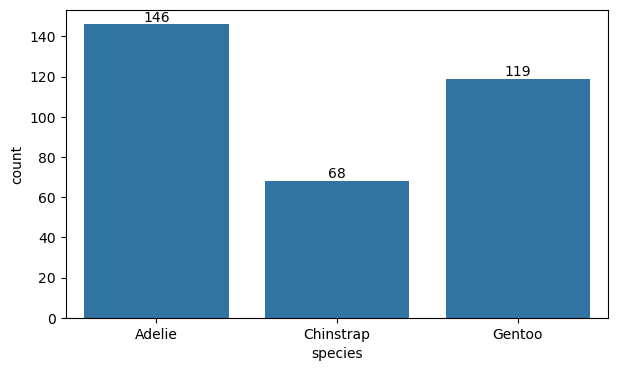

In [16]:
ax = sns.countplot(x="species", data = df)
ax.bar_label(ax.containers[0]);

# There is an inbalanced situation in the data, but we will decide
# whether to treat the data as inbalanced or not after seeing the scores.

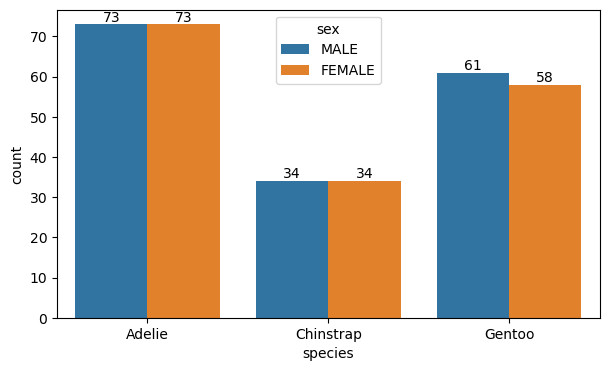

In [17]:
ax = sns.countplot(x="species", hue="sex", data = df)
for p in ax.containers:
    ax.bar_label(p)

# distrubutions among gender

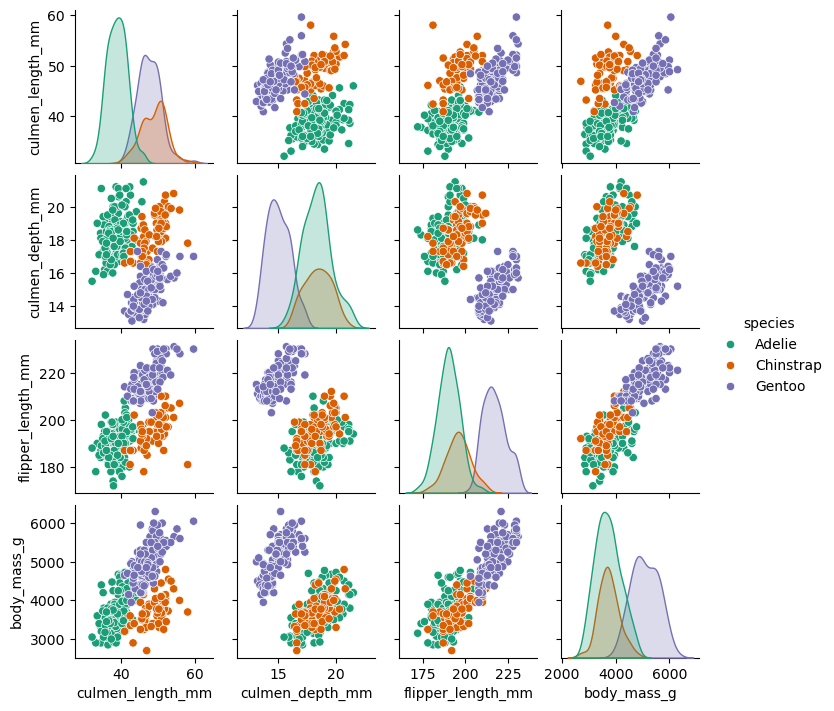

In [18]:
sns.pairplot(df,hue='species',palette='Dark2', size=1.8) #height=2, aspect=1

# Here, we can see how distinctive each feature is,
# but we can also see how the labels differ in terms of which features.

In [19]:
df2.select_dtypes("number").head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


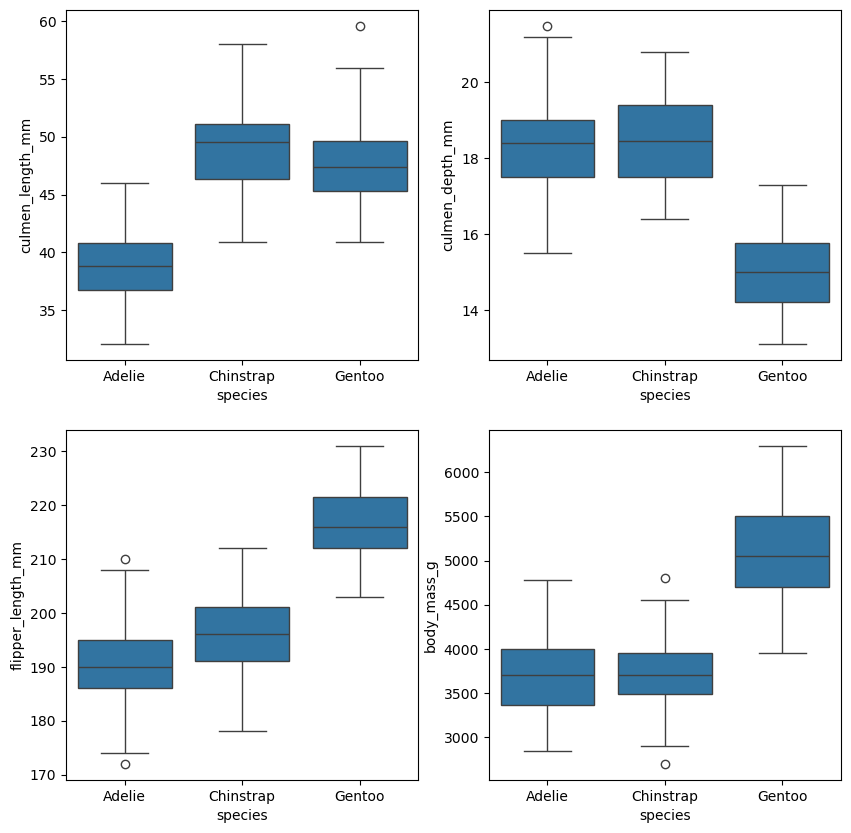

In [20]:
index = 0
plt.figure(figsize=(10,10))
for feature in df.select_dtypes("number"):
    if feature != "species":
        index += 1
        plt.subplot(2,2,index)
        sns.boxplot(x='species',y=feature,data=df)

# from box plots, we can have same insight as the pair plot

In [21]:
# !pip install plotly

In [22]:
import plotly.express as px

In [23]:
fig = px.scatter_3d(df,
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

# 3D graph of features with color as target

## Correlation beetwen numeric features

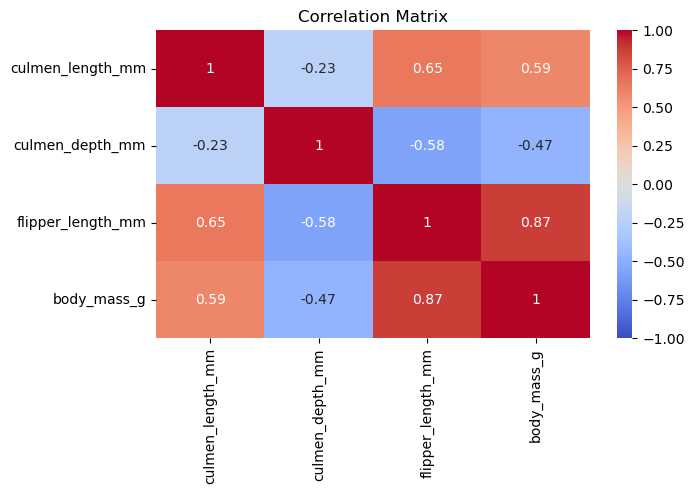

In [24]:
sns.heatmap(df.select_dtypes("number").corr(),annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlation Matrix")

plt.show();

# Since tree-based models are non-parametric (without coefficients) models, multicollinearity is not a problem.

## Train | Test Split

In [25]:
X = df.drop(columns="species")
y = df['species']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## OrdinalEncoder and Categoric Variable

https://bookdown.org/max/FES/categorical-trees.html

https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

In [27]:
# In an academic study on tree-based models;
# 1. Ordinal encoder scores are better than one hot encoder scores on average around 1%, 2%,
# 2. During training, the ordinal encoder works 2.5 times faster than the one hot encoder,
# 3. It has been seen that Ordinal encoder should be used in order to obtain the correct feature importance.

# In tree-based models, if our goal is to score only, we can use both one hot encoder and ordinal encoder.
# However, we will use ordinal encoder in tree-based models due to the advantages mentioned above.

# We said that if your goal is only to score, we can use ordinal encoder or one hot encoder.
# However, we certainly do not convert observations to dummies features (one hot encoder) using the get_dummies function.
# Because get_dummies function causes data leakage problem.
# Note that we should always use one hot encoder instead of get_dummies.

In [28]:
cat = X_train.select_dtypes("object").columns
cat

# Since we will perform the transformations according to the unique categorical data in the train data,
# we first determine the categorical features in the train data.

Index(['island', 'sex'], dtype='object')

## Modeling with Pipeline

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [30]:
column_trans.fit_transform(X_train)

# As you can see the df feats of the make_column_transformer function have been reordered so
# that the first features are categorical, the next features are numeric.

,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
285,0.0,1.0,49.8,16.8,230.0,5700.0
183,1.0,1.0,54.2,20.8,201.0,4300.0
211,1.0,0.0,45.6,19.4,194.0,3525.0
193,1.0,0.0,46.2,17.5,187.0,3650.0
134,1.0,0.0,38.1,17.6,187.0,3425.0
...,...,...,...,...,...,...
108,0.0,0.0,38.1,17.0,181.0,3175.0
1,2.0,0.0,39.5,17.4,186.0,3800.0
53,0.0,1.0,42.0,19.5,200.0,4050.0
67,0.0,1.0,41.1,19.1,188.0,4100.0


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

## Model Performance on Classification Tasks

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [33]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

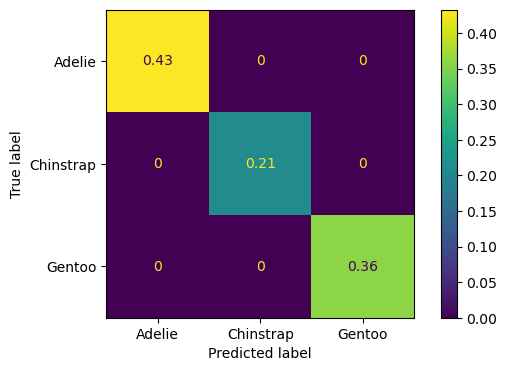

In [34]:
ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test,normalize='all')

In [35]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# Although our data is inbalanced, we will not make any imbalanced treatment to the data
# since our scores are close to each other.

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  54   0]
 [  0   0  95]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



## Cross Validate

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [37]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ["accuracy",
                                   "precision_micro",
                                   "recall_micro",
                                   "f1_micro"],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.970085
train_accuracy           1.000000
test_precision_micro     0.970085
train_precision_micro    1.000000
test_recall_micro        0.970085
train_recall_micro       1.000000
test_f1_micro            0.970085
train_f1_micro           1.000000
dtype: float64

## Evaluating ROC Curves and AUC

In [38]:
# !pip install scikit-plot

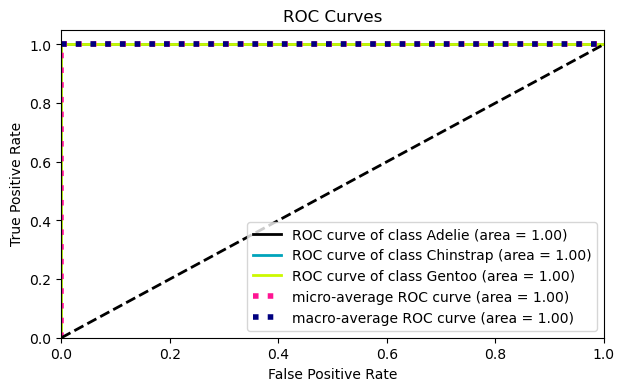

In [39]:
from scikitplot.metrics import plot_roc, precision_recall_curve

operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

## Feature Importances with Pipeline

https://github.com/scikit-learn/scikit-learn/issues/21304

In [40]:
cat

Index(['island', 'sex'], dtype='object')

In [41]:
pipe_model["DT_model"].feature_importances_ # DT_model.feature_importances_

# Since we are using pipelines, we use pipe_model["DT_model"] to pull our ML model from inside the pipeline first,
# and then define the percentages as % for all features with the feature_importance_code.
# The feature with the highest rating is the most important feature,
# while the feature with the lowest rating is the least important feature.
# These percentages show the contribution of the features to the estimation.


# Since the make_column_transformer function used in the pipe_model changes the order of features in df,
# the first 2 rates below belong to categorical features, while the next rates belong to numeric features.

# If the make_column_transformer was not used in the pipeline, df's feature order would not change.
# REMEMBER that the ordering changes only when the make_column_transformer function is used.

# feature importance is done after getting the best scores from the model.
# Since I could get very high scores with the default hyper parameters of the DT model for this data,
# we made feature importance without gridsearch. However, we do not forget that
# we need to do feature importance over the best hyper_paramtres we found after gridsearch.

array([0.03656706, 0.03209286, 0.34416147, 0.06879777, 0.51248624,
       0.00589461])

In [42]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

# The new feature order we got from pipe_model is as follows.

array(['island', 'sex', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g'], dtype=object)

In [43]:
X_train.head(1)

# Normally, the feature order of the df we piped the data was as below.

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
285,Biscoe,49.8,16.8,230.0,5700.0,MALE


In [44]:
pipe_model["OrdinalEncoder"].fit_transform(X_train).head()

# We can pull the make_column_transformer function that transforms the ordinalencoder from
# the pipe_model with pipe_model["OrdinalEncoder"]. Then, using the function,
# we can observe the change in the train data below.
# As you can see, there are categorical features first, followed by numeric features.

# In both training and predict phases, the data is given to the model in the following df structure.

,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
285,0.0,1.0,49.8,16.8,230.0,5700.0
183,1.0,1.0,54.2,20.8,201.0,4300.0
211,1.0,0.0,45.6,19.4,194.0,3525.0
193,1.0,0.0,46.2,17.5,187.0,3650.0
134,1.0,0.0,38.1,17.6,187.0,3425.0


In [45]:
df_f_i = pd.DataFrame(data=pipe_model["DT_model"].feature_importances_,
                      index=features, #index=X.columns
                      columns=["Feature Importance"])

df_f_i = df_f_i.sort_values("Feature Importance", ascending=False)

df_f_i

# We defined the df that shows the featue importance ratios as df_f_i.
# With pipe_model["DT_model"].feature_importances_ in the df, we define feature importance ratios,
# feature names (features) whose order changes after make_column_transform to the index.
# Then we sort the feature importance values from largest to smallest.

,Feature Importance
flipper_length_mm,0.512486
culmen_length_mm,0.344161
culmen_depth_mm,0.068798
island,0.036567
sex,0.032093
body_mass_g,0.005895


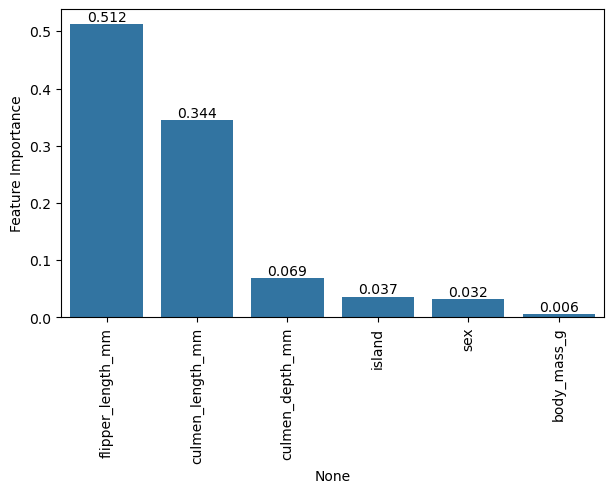

In [46]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.show();

# We visualize feature importance values with barplot.
# When making feature selection, we do it according to the order here.

## Drop most important feature

In [47]:
X.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [48]:
X2 = X.drop(columns = ["flipper_length_mm"])

In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101)

In [50]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeClassifier(random_state=101))]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X_train2, y_train2)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

In [51]:
eval_metric(pipe_model2, X_train2, y_train2, X_test2, y_test2)

# Our 3 errors in the test data decreased to 1 and the scores of the test and train data came closer to each other.

Test_Set
[[30  1  0]
 [ 0 16  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.94      1.00      0.97        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Train_Set
[[115   0   0]
 [  0  52   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       115
   Chinstrap       1.00      1.00      1.00        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



In [52]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train2,
                        y_train2,
                        scoring = ["accuracy",
                                   "precision_micro",
                                   "recall_micro",
                                   "f1_micro"],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# With the most important feature, we get 0.973789 scores after CV, now we get 0.985185 scores from CV. This is better. With low variance the model can generalize better.
# As you can see, the variance between the validation and train data in the CV is also removed.

test_accuracy            0.985185
train_accuracy           1.000000
test_precision_micro     0.985185
train_precision_micro    1.000000
test_recall_micro        0.985185
train_recall_micro       1.000000
test_f1_micro            0.985185
train_f1_micro           1.000000
dtype: float64

## Adelie-Chinstrap weighted metric Scores

In [53]:
from sklearn.metrics import make_scorer

In [54]:
scoring = {'precision-Adelie-Chinstrap': make_scorer(precision_score,
                                                     average="weighted",
                                                     labels=["Adelie", "Chinstrap"]),
           'recall-Adelie-Chinstrap': make_scorer(recall_score,
                                                  average="weighted",
                                                  labels =["Adelie", "Chinstrap"]),
           'f1-Adelie-Chinstrap': make_scorer(f1_score,
                                              average="weighted",
                                              labels = ["Adelie", "Chinstrap"])
          }

# With the make_scorer function, we look at the weighted precision, recall and f1_scores of the classes "Adelie", "Chinstrap"

In [55]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train2,
                        y_train2,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie-Chinstrap     0.981303
train_precision-Adelie-Chinstrap    1.000000
test_recall-Adelie-Chinstrap        0.982353
train_recall-Adelie-Chinstrap       1.000000
test_f1-Adelie-Chinstrap            0.979985
train_f1-Adelie-Chinstrap           1.000000
dtype: float64

## Visualize the Tree

In [56]:
from sklearn.tree import plot_tree

# We will visualize trees to better understand the DT hyper_ parameters.

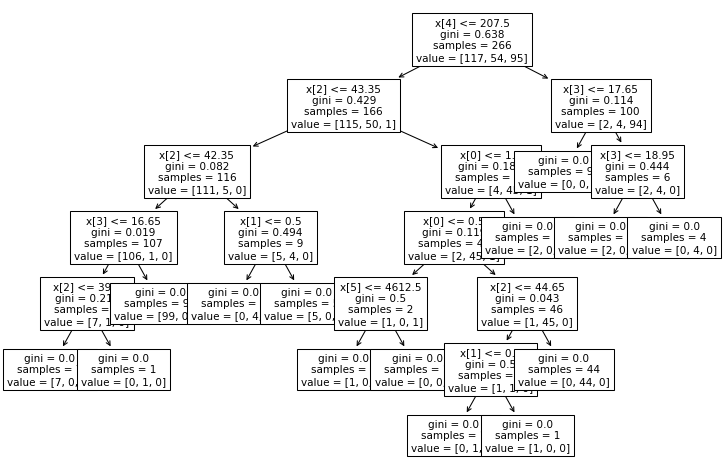

In [57]:
plt.figure(figsize=(12,8), dpi=75)
plot_tree(pipe_model["DT_model"], fontsize=10);

# When we insert the model into plot_tree, it shows us which featurs the leaf splits
# take place in which value ranges. In order to better understand the image,
# we need to define the feature names and class names.

In [58]:
X.columns

Index(['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [59]:
features

# We do not forget that since we are using pipe_model in tree plot, we need to use new feature order as features names.

array(['island', 'sex', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g'], dtype=object)

In [60]:
pd.set_option('display.max_rows', 500)
X_train.flipper_length_mm.sort_values().unique()

array([172., 174., 176., 178., 180., 181., 182., 183., 184., 185., 186.,
       187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197.,
       198., 199., 200., 201., 202., 203., 205., 206., 207., 208., 209.,
       210., 211., 212., 213., 214., 215., 216., 217., 218., 219., 220.,
       221., 222., 223., 224., 225., 226., 228., 229., 230., 231.])

In [61]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

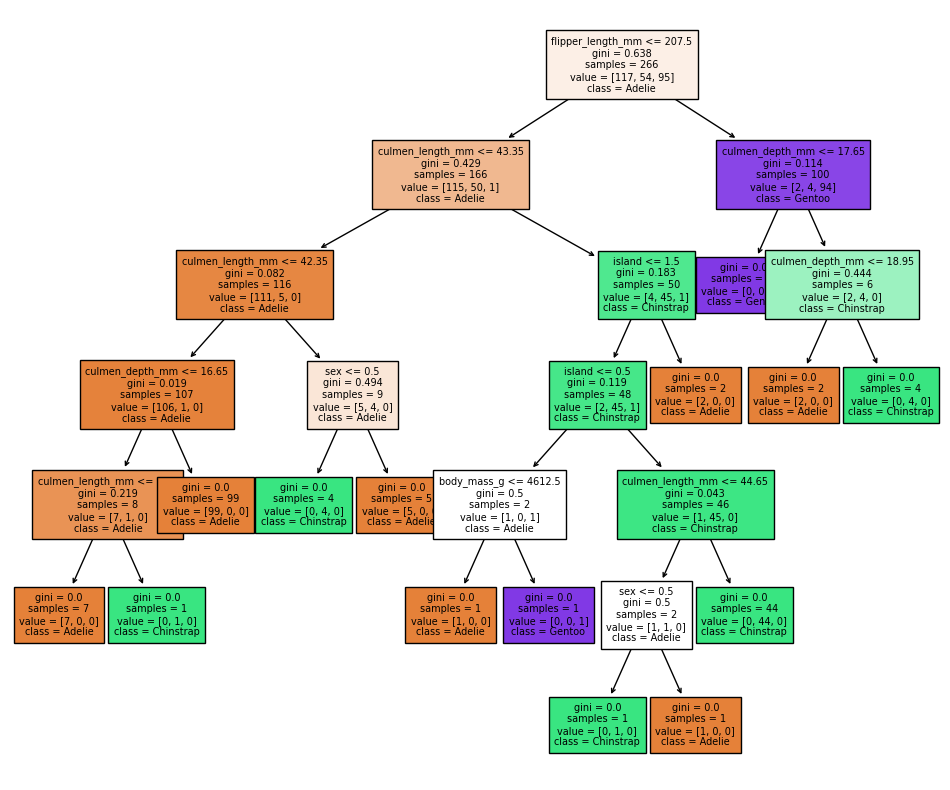

In [62]:
plt.figure(figsize=(12,10),dpi=100)
plot_tree(pipe_model["DT_model"],
          filled=True,
          feature_names=features.tolist(),
          class_names=y.unique().tolist(),
          fontsize=7);

# We made the image more readable by defining features_names and class names.
# Since we use make_column_transform, we keep in mind that the features names are in the new feature order.

# The lower the gini value, the more observations of a similar class are present in that leaf.
# If gini is 0, it indicates that all observations in that leaf belong to the same class.
# the max gini value on a sheet can be 1-1/n (n=class number). The maximum value for this data can be 1-1/3=0.67.
# The max gini value indicates that there are plenty of observations from each class.

# Since the splitter condition of the leaves in the DT model is made according to the best feature by default,
# in this image the flipper_length_mm feature, which contributes the most to the prediction of the first leaf model.
# shows the total number of observations in the samples train data on the first sheet,
# and value shows how many observations are from which class according to the alphabetic/numeric order of the classes.

# Number of samples on other leaves shows how many observations fell on that leaf after division,
# and value shows how many observations from which class.

# class indicates which class the model will assign the observations falling on that leaf
# (it also defines the majority class falling on that leaf).

## Understanding Hyperparameters

### Max depth

In [63]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('')
    print(classification_report(y_test,model_pred))
    print('')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["DT_model"], filled=True, feature_names=features.tolist(), class_names = y.unique().tolist(), fontsize=10);
    #feature_names=X.columns

# We will compare the test and train data scores with the report_model function and
# then visualize the trees to observe how the DT hyper parameters make changes in the trees.

In [64]:
DT_model = DecisionTreeClassifier(max_depth=3, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('DT_model',
                 DecisionTreeClassifier(max_depth=3, random_state=101))])


Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Train Set
[[115   2   0]
 [  5  49   0]
 [  0   1  94]]

              precision    recall  f1-score   support

      Adelie       0.96      0.98      0.97       117
   Chinstrap       0.94      0.91      0.92        54
      Gentoo       1.00      0.99      0.99        95

    accuracy                           0.97       266
   macro avg       0.97      0.96      0.96       266
weighted avg       0.97      0.97      0.97       266



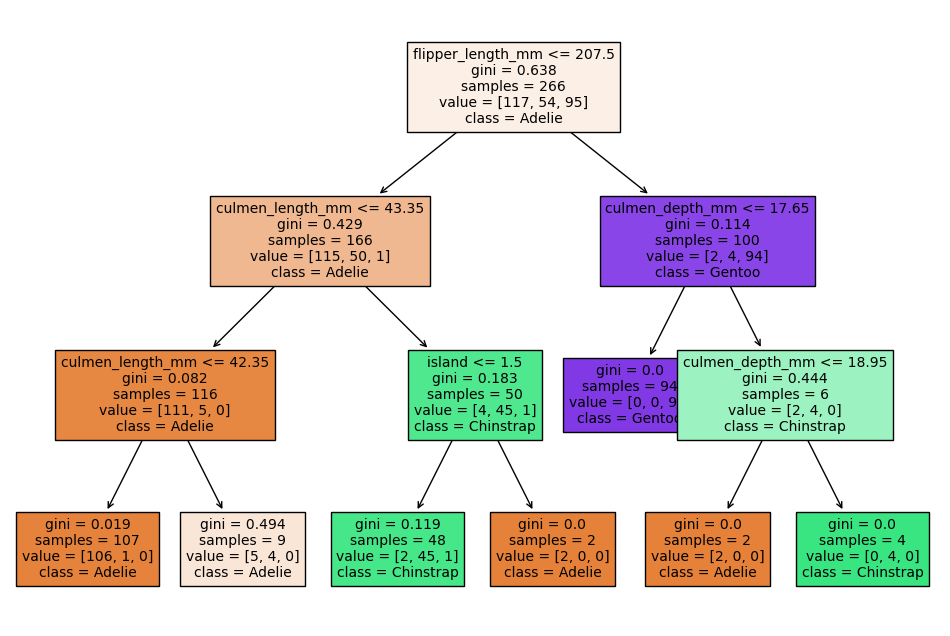

In [65]:
report_model(pruned_tree)

# max_depth shows how deep the split goes.

# The most important parameter used to prevent overfiting is max_dept.

# max_depth default is None, so it will continue to branch until all leaves are pure (gini/entropy being 0).

### min samples split


Test Set
[[29  0  0]
 [ 0 14  0]
 [ 1  0 23]]

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67


Train Set
[[115   2   0]
 [  6  48   0]
 [  1   0  94]]

              precision    recall  f1-score   support

      Adelie       0.94      0.98      0.96       117
   Chinstrap       0.96      0.89      0.92        54
      Gentoo       1.00      0.99      0.99        95

    accuracy                           0.97       266
   macro avg       0.97      0.95      0.96       266
weighted avg       0.97      0.97      0.97       266



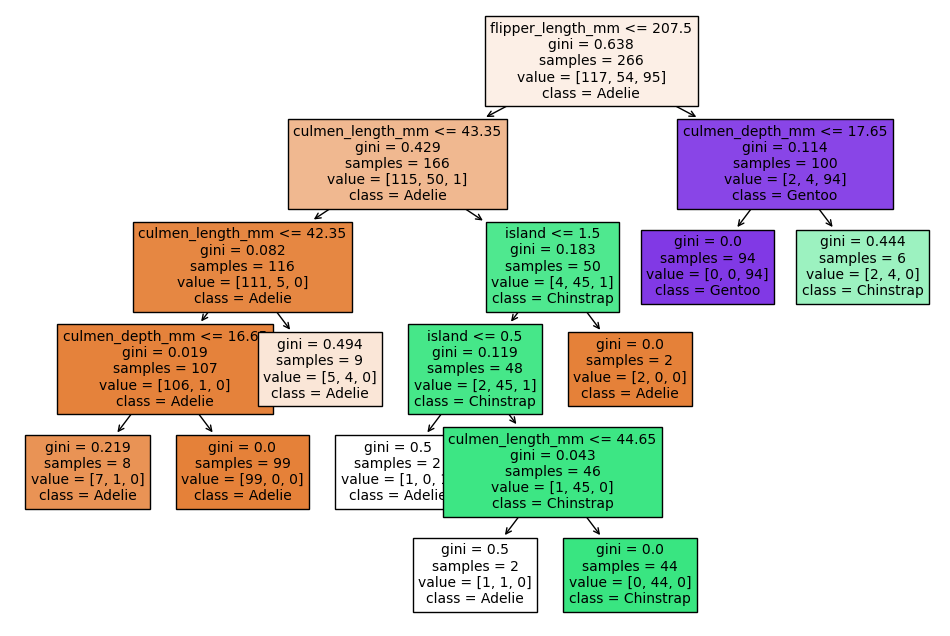

In [66]:
DT_model = DecisionTreeClassifier(min_samples_split=10, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)

# min samples split Shows the minimum number of observations a leaf must have in order for it to continue to divide.
# default value is 2.

### min samples leaf


Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Train Set
[[111   4   2]
 [  5  45   4]
 [  0   1  94]]

              precision    recall  f1-score   support

      Adelie       0.96      0.95      0.95       117
   Chinstrap       0.90      0.83      0.87        54
      Gentoo       0.94      0.99      0.96        95

    accuracy                           0.94       266
   macro avg       0.93      0.92      0.93       266
weighted avg       0.94      0.94      0.94       266



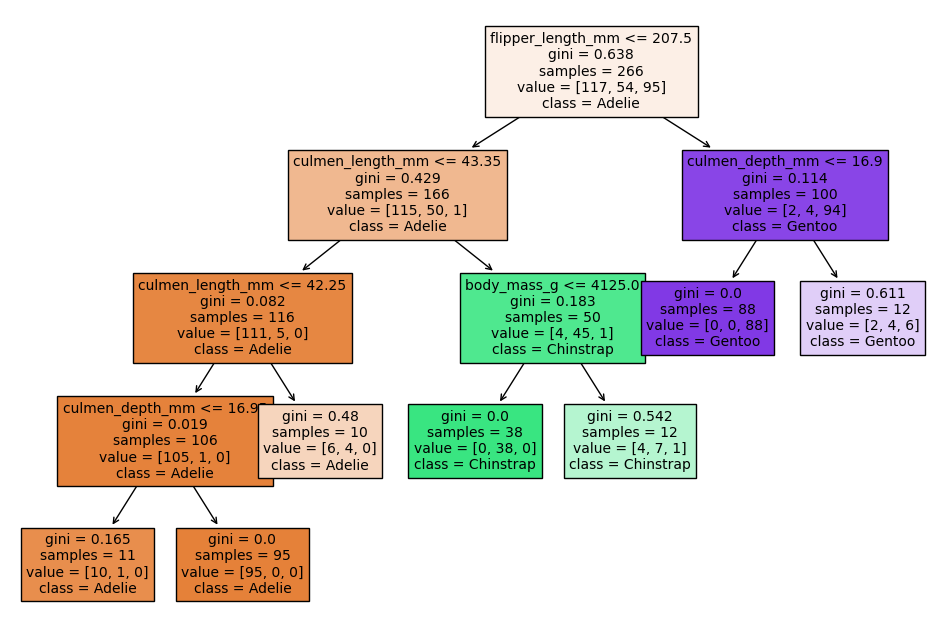

In [67]:
DT_model = DecisionTreeClassifier(min_samples_leaf=10, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree = Pipeline(steps=operations) #pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)

# min samples leaf Displays the minimum number of observations that must be present on a leaf
# for it to be considered a leaf by the model.

# the default value is 1.

### Max Leaf Nodes


Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Train Set
[[113   4   0]
 [  5  49   0]
 [  0   1  94]]

              precision    recall  f1-score   support

      Adelie       0.96      0.97      0.96       117
   Chinstrap       0.91      0.91      0.91        54
      Gentoo       1.00      0.99      0.99        95

    accuracy                           0.96       266
   macro avg       0.96      0.95      0.95       266
weighted avg       0.96      0.96      0.96       266



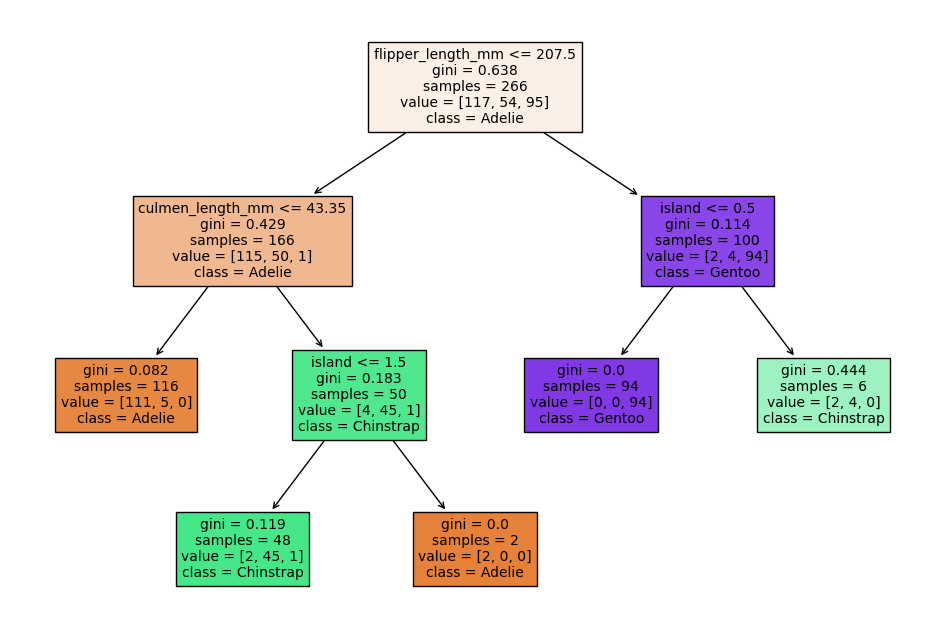

In [68]:
DT_model = DecisionTreeClassifier(max_leaf_nodes=5, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

pruned_tree_2 = Pipeline(steps=operations)
pruned_tree_2.fit(X_train,y_train)

report_model(pruned_tree_2)

# We can limit the maximum number of leaves we can obtain as a result of splitting Max Leaf Nodes leaves.
# We use this parameter to prevent overfitting. However, it is very difficult to edit this parameter,
# especially in very large data.

# The default value is None. Allows Maximum branching that the model can achieve.

## Criterion


Test Set
[[28  1  0]
 [ 0 14  0]
 [ 0  1 23]]

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.88      1.00      0.93        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.97        67
   macro avg       0.96      0.97      0.96        67
weighted avg       0.97      0.97      0.97        67


Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  95]]

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



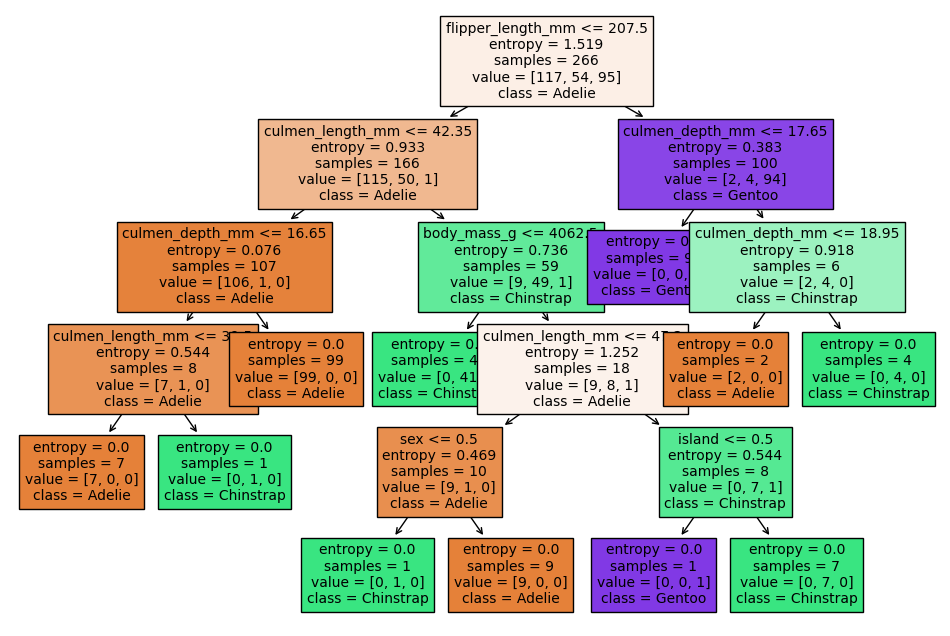

In [69]:
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

entropy_tree = Pipeline(steps=operations)

entropy_tree.fit(X_train,y_train)

report_model(entropy_tree)

# We specify whether gini or entropy values should be taken into account for the division criterion.
# We can use both as well. If we do not impose any constraints on the model,
# it will continue to divide until the value of gini or entropy is 0.
# maximum log2(n) (number of n:classes) while entropy min takes 0 value. The maximum entropy value for our data is log2(3) = 1.585
# max 1-1/n (number of n:classes) while gini takes a min 0 value. The max gini value for our data is 1-1/3 = 0.67
# default is gini.

In [70]:
np.log2(3)

1.584962500721156

## Splitter


Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  95]]

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



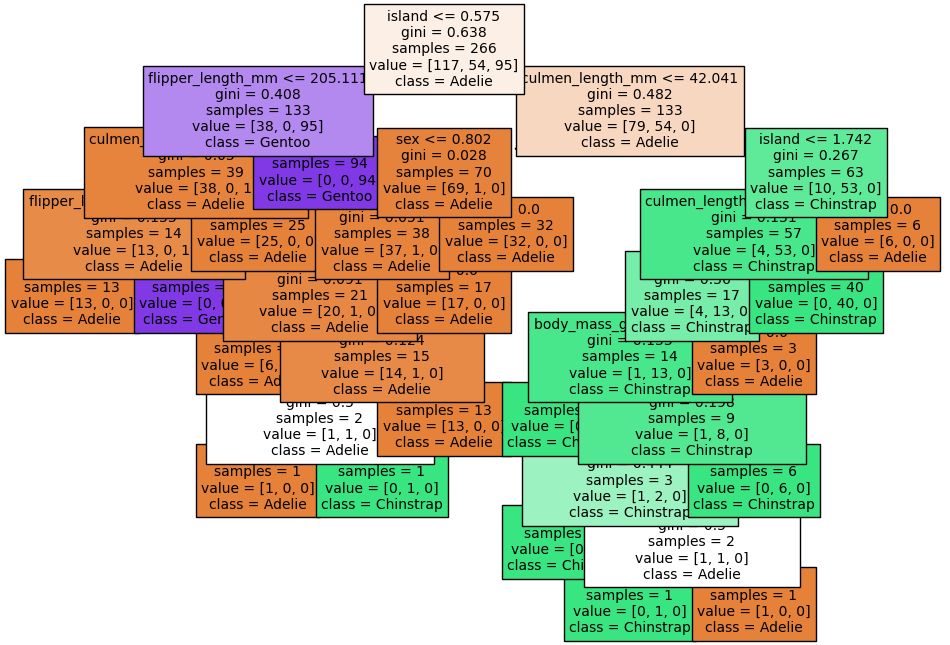

In [71]:
DT_model = DecisionTreeClassifier(splitter = "random")
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

report_model(tree)

# splitter decides how to select features that will be used in all subsequent branches including
# the first branch of the model. Splitter can be "best" or "random".

# If the splitter is "best";
# 1. For each branch, the feature that makes the best class distinction is used.
# "random" means that any feature randomly chosen by the model will be used.

# 2. After asking if/else questions to all features, it is the feature best feature
# that gives us the best class distinction. And the division operations in
# each node are done according to the best features.

# The same features can be used over and over in every split, as if/else questions are asked again
# to all features for each split.

# If we choose the splitter "random", the model randomly selects a feature at each split stage and
# tries to get the best classification from that feature. However, Random causes too many branches.

# Since the use of best feature in division processes prevents the model from obtaining insight from all features,
# the feature importances we get from the DT model can give us realistic results.
# However, if we use splitter random, feature importance will be more reliable as the model
# gets insights from all features. In tree based models, we obtain the most reliable feeature importance results
# from random forest and xgboost models.

# default is "best".

## Max_features


Test Set
[[27  2  0]
 [ 0 14  0]
 [ 0  0 24]]

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.96        29
   Chinstrap       0.88      1.00      0.93        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.97        67
   macro avg       0.96      0.98      0.97        67
weighted avg       0.97      0.97      0.97        67


Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  95]]

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



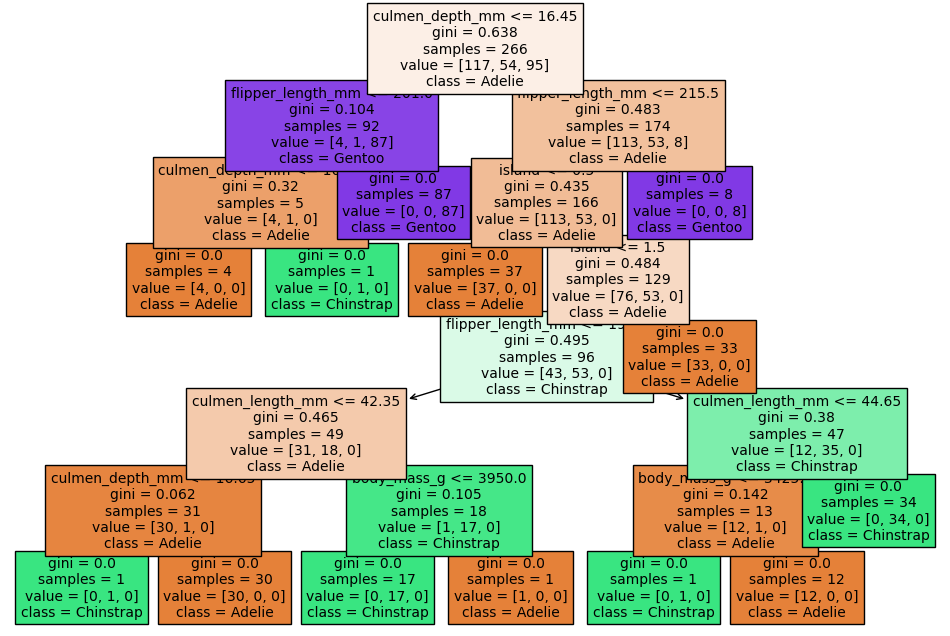

In [72]:
DT_model = DecisionTreeClassifier(max_features=3)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train,y_train)

report_model(tree)

# max_features is a constraint on the branching of leaves so that the model can derive insight from all features.
# The default value of max_features is None. In other words, it means choose the best or random feature
# to be used in leaf divisions among all the featurs in our data.

# What happens if we set a limit to this selection with max_feature? If we talk about Max_features =3;
# If splitter="best", the best feature to be used in the splitting phase of the leaves is not among all
# the featurs in our data, but the best feature is selected from among the 3 features randomly chosen by the model
# and the division is made over this feature, and this process is repeated at each split stage.

# If splitter="random", the random feature to be used in the splitting phase of the leaves is not among
# all the features in our data, but a random feature is selected from 3 features chosen randomly by the model,
# and the split is done over this feature, and this process is repeated at each split stage.

# As you can see, we add a randomness to the division operations of the model with max_feature.
# In this way, we try to obtain a more accurate feature importance by obtaining insights from all
# the features of the model in the data.

# The default for max_features is None. So it uses all the features in df.

## Find Best Parameters

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

In [75]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "DT_model__max_depth": [None, 2, 3, 4, 5],
              "DT_model__min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "DT_model__min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [76]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [77]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['island', 'sex'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('DT_model',
                                        DecisionTreeClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 3, 4, 5],
                         'DT_model__max_features': [None, 'auto', 'log2', 2, 3,
                                                    4, 5, 6, 7],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'DT_model__min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='f1_micro')

In [78]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.988889
mean_train_score    0.992901
Name: 12, dtype: object

In [79]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))])

In [80]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[30  1  0]
 [ 0 16  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.94      1.00      0.97        16
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


Train_Set
[[114   1   0]
 [  1  51   0]
 [  0   0  99]]
              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       115
   Chinstrap       0.98      0.98      0.98        52
      Gentoo       1.00      1.00      1.00        99

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266



In [81]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeClassifier(min_samples_split=9,
                                                  random_state=101))]

scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train2,
                        y_train2,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.988889
train_accuracy           0.992901
test_precision_micro     0.988889
train_precision_micro    0.992901
test_recall_micro        0.988889
train_recall_micro       0.992901
test_f1_micro            0.988889
train_f1_micro           0.992901
dtype: float64

## Final Model

In [82]:
X = df.drop(columns=["species", "flipper_length_mm"])
y = df['species']

In [83]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeClassifier(min_samples_split=9,
                                                  random_state=101))]

pipe_final_model = Pipeline(steps=operations)

pipe_final_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_split=9,
                                        random_state=101))])

## Prediction

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
culmen_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


In [85]:
samples = {"island": ["Torgersen", "Biscoe"],
           "culmen_depth_mm":[18,14],
           "culmen_length_mm": [39, 48],
           'flipper_length_mm':[180, 214],
           "sex":["MALE","FEMALE"],
           'body_mass_g': [3700,4900]
           }

In [86]:
df_samples = pd.DataFrame(samples)
df_samples

# The order of the features of the data I gave for prediction is different and 1 feature is missing.

,island,culmen_depth_mm,culmen_length_mm,flipper_length_mm,sex,body_mass_g
0,Torgersen,18,39,180,MALE,3700
1,Biscoe,14,48,214,FEMALE,4900


In [87]:
X.head()

# There is no flipper_length_mm feature in the data I gave the model for training,                                                                                            
# even if I give the above df_samples data to the model for prediction
# which does not include this feature. The model will still make a prediction.

# Because if the make_column_transform function detects that a featur other than
# the featurs it saw in the original data during the training phase was given to
# the model in the predict phase, it ignores this feature.

,island,culmen_length_mm,culmen_depth_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,3750.0,MALE
1,Torgersen,39.5,17.4,3800.0,FEMALE
2,Torgersen,40.3,18.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,3450.0,FEMALE
5,Torgersen,39.3,20.6,3650.0,MALE


In [88]:
pd.DataFrame(column_trans.transform(df_samples))

,island,sex,culmen_length_mm,culmen_depth_mm,body_mass_g
0,2.0,1.0,39,18,3700
1,0.0,0.0,48,14,4900


In [89]:
pipe_final_model.predict(df_samples)

array(['Adelie', 'Gentoo'], dtype=object)

END OF THE PROJECT